# 07. 머신 러닝(Machine Learning) 개요

# 4) 자동 미분과 선형 회귀 실습

## 1. 자동 미분

In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

tape_gradient()는 자동 미분 기능을 수행합니다. 

In [3]:
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


## 2. 자동 미분을 이용한 선형 회귀 구현

In [17]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [18]:
@tf.function
def hypothesis(x):
    return w*x + b

In [19]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


손실 함수: 평균 제곱 오차

In [20]:
@tf.function
def mse_loss(y_pred, y):
    # 두 개의 차이값을 제곱을 해서 평균을 취한다.
    return tf.reduce_mean(tf.square(y_pred - y))

In [21]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [22]:
optimizer = tf.optimizers.SGD(0.01)

In [23]:
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(x)

        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)

        # 손실 함수에 대한 파라미터의 미분값 계산
        gradients = tape.gradient(cost, [w, b])

        # 파라미터 업데이트
        optimizer.apply_gradients(zip(gradients, [w, b]))

        if i % 30 == 0:
            print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch : 180 | w의 값 : 10.5909 | b의 값 : 1.387 | cost : 1.131752
epoch : 210 | w의 값 : 10.6016 | b의 값 :  1.32 | cost : 1.116026
epoch : 240 | w의 값 : 10.6111 | b의 값 :  1.26 | cost : 1.103736
epoch : 270 | w의 값 : 10.6195 | b의 값 : 1.207 | cost : 1.094143
epoch : 300 | w의 값 : 10.6269 | b의 값 : 1.161 | cost : 1.086645


In [25]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy().round(4))

[38.3548 54.2951 59.6086 64.922 ]


## 3. 케라스로 구현하는 선형 회귀

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

C:\Users\seungwon\anaconda3\envs\scratch\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 2721.9226 - mse: 2721.9226
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 335.9145 - mse: 335.9145
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 42.3335 - mse: 42.3335
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 6.2100 - mse: 6.2100
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 1.7647 - mse: 1.7647
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 1.2172 - mse: 1.2172
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1492 - mse: 1.1492
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1403 - mse: 1.1403
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1386 - mse: 1.1386
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1378 - mse: 1.1378
Epoch 11/300
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 1.1006 - mse: 1.1006
Epoch 90/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1002 - mse: 1.1002
Epoch 91/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0999 - mse: 1.0999
Epoch 92/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0996 - mse: 1.0996
Epoch 93/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0992 - mse: 1.0992
Epoch 94/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0989 - mse: 1.0989
Epoch 95/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0986 - mse: 1.0986
Epoch 96/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0983 - mse: 1.0983
Epoch 97/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0980 - mse: 1.0980
Epoch 98/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0977 - mse: 1.0977
Epoch 99/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0973 - ms

1/1 [==============================] - 0s 5ms/step - loss: 1.0798 - mse: 1.0798
Epoch 177/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0796 - mse: 1.0796
Epoch 178/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0794 - mse: 1.0794
Epoch 179/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0793 - mse: 1.0793
Epoch 180/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0791 - mse: 1.0791
Epoch 181/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0790 - mse: 1.0790
Epoch 182/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0788 - mse: 1.0788
Epoch 183/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0786 - mse: 1.0786
Epoch 184/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0785 - mse: 1.0785
Epoch 185/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0783 - mse: 1.0783
Epoch 186/300
1/1 [==============================] - 0s 5ms/step - loss: 1

1/1 [==============================] - 0s 5ms/step - loss: 1.0696 - mse: 1.0696
Epoch 264/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0695 - mse: 1.0695
Epoch 265/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0694 - mse: 1.0694
Epoch 266/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0694 - mse: 1.0694
Epoch 267/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0693 - mse: 1.0693
Epoch 268/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0692 - mse: 1.0692
Epoch 269/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0691 - mse: 1.0691
Epoch 270/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0690 - mse: 1.0690
Epoch 271/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0690 - mse: 1.0690
Epoch 272/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0689 - mse: 1.0689
Epoch 273/300
1/1 [==============================] - 0s 4ms/step - loss: 1

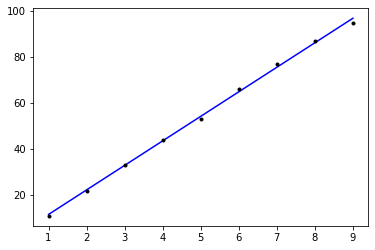

In [27]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [28]:
print(model.predict([9.5]))

[[102.20359]]
